<a href="https://colab.research.google.com/github/autheblanc/skills-introduction-to-github/blob/create-my-first-branch/xinyi_s_milk_reward_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Q1. Create a subfolder containing only (and all) the .csv files. Use "glob" to read all the files into a list.
     #then loop through the list and create data
import pandas as pd
import glob
import os
import numpy as np
data = glob.glob('/content/drive/MyDrive/Rigs/*.csv')
rig_data={}


for filename in data:
  rig_name = os.path.basename(filename).split('.')[0]  # Extract rig name from filename
  rig_data[rig_name] = pd.read_csv(filename)


  #print(rig_data[rig_name])

rig_dataframe = pd.concat(rig_data, axis=1, keys=rig_data.keys())



In [5]:
import numpy as np
def get_rig_data():

  for i in range(2,8):
    rig_i=np.array(rig_data[f'Rig{i}'])
    rig_i_row=rig_i[4:11,0].astype(int)
    rig_i_column=rig_i[4:11, 1].astype(float)/5 *1000
    Rig_i=np.stack((rig_i_row,rig_i_column),axis=1)
    globals()[f'Rig_{i}']=Rig_i
    print(globals()[f'Rig_{i}'])



  return Rig_2,Rig_3,Rig_4,Rig_5,Rig_6,Rig_7

Rig2,Rig_3,Rig_4,Rig_5,Rig_6,Rig_7=get_rig_data()

[[100.    15.2 ]
 [100.    15.5 ]
 [200.    30.7 ]
 [200.    28.5 ]
 [300.    47.92]
 [300.    46.02]
 [400.    64.94]]
[[100.    13.28]
 [100.    14.74]
 [200.    29.88]
 [200.    29.1 ]
 [300.    44.38]
 [300.    46.44]
 [400.    60.78]]
[[100.     9.4 ]
 [100.     8.74]
 [100.    13.46]
 [200.    16.98]
 [300.    18.96]
 [300.    19.92]
 [400.    23.98]]
[[100.     5.36]
 [100.     7.16]
 [200.     9.26]
 [200.     8.82]
 [300.    15.5 ]
 [300.    13.76]
 [400.    17.36]]
[[100.     9.26]
 [100.    12.7 ]
 [200.    18.32]
 [200.    18.62]
 [300.    25.44]
 [300.    26.06]
 [400.    30.14]]
[[100.    14.3 ]
 [100.    16.16]
 [200.    33.18]
 [200.    33.9 ]
 [300.    50.6 ]
 [300.    50.34]
 [400.    67.06]]


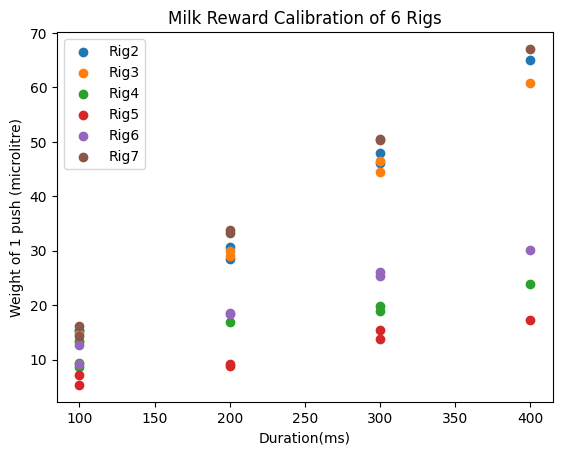

In [7]:
import matplotlib.pyplot as plt
for i in range(2,8):
  rig_i=np.array(rig_data[f'Rig{i}'])
  rig_i_row=rig_i[4:11,0].astype(int)
  rig_i_column=rig_i[4:11, 1].astype(float)/5 *1000
  plt.scatter(rig_i_row, rig_i_column,label=f'Rig{i}')

plt.xlabel('Duration(ms)')
plt.ylabel('Weight of 1 push (microlitre)')
plt.title('Milk Reward Calibration of 6 Rigs')
plt.legend()
plt.show()

In [8]:
Rigs=[Rig_2,Rig_3,Rig_4,Rig_5,Rig_6,Rig_7]

In [36]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
results_all = {}
slope_values = []
for t in Rigs:
  y=t[:,1]
  x=t[:,0]
  mi = sm.OLS(endog=y,exog=x)
  results = mi.fit()
  #print(results.summary())

  results_all= results.params
  slope_values.append(results_all[0])

results.df=pd.DataFrame({'Rig':[2,3,4,5,6,7],
                           'Slope(ul per ms)':slope_values})
print(results.df)

   Rig  Slope(ul per ms)
0    2          0.156973
1    3          0.150355
2    4          0.067834
3    5          0.046795
4    6          0.084295
5    7          0.167200


In [37]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
results_all = {}
slope_values_inverse = []
for t in Rigs:
  y=t[:,1]
  x=t[:,0]
  mi = sm.OLS(endog=x,exog=y)
  results = mi.fit()
  #print(results.summary())

  results_all= results.params
  slope_values_inverse.append(results_all[0])

results.df=pd.DataFrame({'Rig':[2,3,4,5,6,7],
                           'Slope(ms per ul)':slope_values_inverse})
print(results.df)

   Rig  Slope(ms per ul)
0    2          6.361375
1    3          6.646361
2    4         14.149600
3    5         21.128949
4    6         11.722128
5    7          5.977602


In [29]:
x=np.arange(0,450)

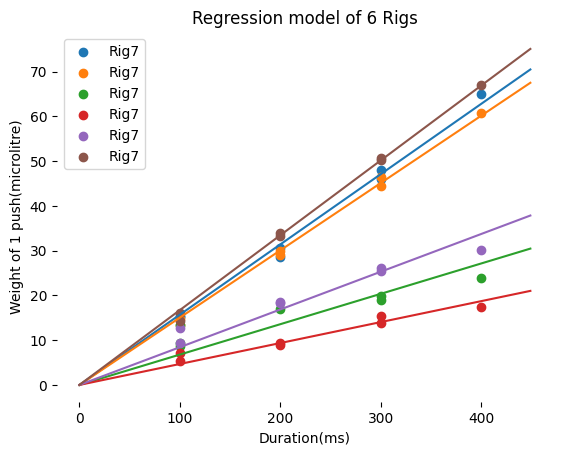

In [32]:
for i in range(2,8):
  weight_pred_i=slope_values[i-2]*x
  plt.plot( x, weight_pred_i)

for t in Rigs:
  plt.scatter(t[:,0],t[:,1],label=f'Rig{i}')

plt.title('Regression model of 6 Rigs')
plt.xlabel('Duration(ms)')
plt.ylabel('Weight of 1 push(microlitre)')
plt.legend()
plt.box(False)
plt.show()

In [42]:
#dataframe with three columns: rig_name, and uL per ms, and ms per uL
#rows is number of rigs
#rig_names should be standardized: "172_2", "172_3"...


import pandas as pd

#dataframe with three columns: rig_name, and uL per ms, and ms per uL
#rows is number of rigs
#rig_names should be standardized: "172_2", "172_3"...

#save dataframe into csv file called "calibrations.csv"

final_df = pd.DataFrame({'Rig Name': ["172_2", "172_3", "172_4", "172_5", "172_6", "172_7"],
                       'ul per ms': slope_values,
                       'ms per ul': slope_values_inverse})
print(final_df)
final_df.to_csv('calibrations.csv', index=False)


  Rig Name  ul per ms  ms per ul
0    172_2   0.156973   6.361375
1    172_3   0.150355   6.646361
2    172_4   0.067834  14.149600
3    172_5   0.046795  21.128949
4    172_6   0.084295  11.722128
5    172_7   0.167200   5.977602
